# 1. Exploratory Data Analysis

## 1.1. Airline Fuel Cost and Consumption

### 1.1.1.January 2000 - October 2020

Source: https://www.transtats.bts.gov/fuel.asp

- **ALL_AIRLINES_FUEL_COST_CONSUMPTION_1977_1999**:
    - **Summary**:
        - Airline Fuel Cost and Consumption (ALL Carriers) | 1977 - 1999
    - **Description**:
        - Airline Fuel Cost and Consumption (ALL Carriers) | 1977 - 1999
        - It includes data only for ALL Carriers (not only US)
    - **File**:
        - Fuel_Hist_1977_1999.csv

***Note***: the table has been quickly edited on Excel prior to importation into this notebook

___

In [1]:
# Import libraries to be used:

import pandas as pd
import numpy as np
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import warnings # warnings.filterwarnings(action='ignore') # https://docs.python.org/3/library/warnings.html#the-warnings-filter
# from zipfile import ZipFile # De momento no ha hecho falta 

In [2]:
# Show all columns and rows in DataFrames
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None) # It greatly slows down the output display and freezes the kernel

# Show in notebook
%matplotlib inline

# style -> plt.style.available
# plt.style.use('seaborn')
plt.style.use('ggplot')

# theme
sns.set_theme(context='notebook',
              style="darkgrid") # {darkgrid, whitegrid, dark, white, ticks}

# color_palette -> https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
palette = sns.color_palette("flare", as_cmap=True);

In [3]:
if os.name == 'nt': # Windows
    root = r"C:\Users\turge\CompartidoVM\0.TFM"
    print("Running on Windows.")
elif os.name == 'posix': # Ubuntu
    root = "/home/dsc/shared/0.TFM"
    print("Running on Ubuntu.")
print("root path\t", root)

Running on Windows.
root path	 C:\Users\turge\CompartidoVM\0.TFM


___

In [4]:
csv_path = os.path.join(root,
                        "Raw_Data",
                        "US_DoT",
                        "Fuel_Hist_Jan2000_Oct2020.csv")
csv_path

'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Raw_Data\\US_DoT\\Fuel_Hist_Jan2000_Oct2020.csv'

In [5]:
df1 = pd.read_csv(csv_path, encoding='latin1')
df1

,Year,Month,Domestic Consumption (million gallons),Domestic Cost (million dollars),Domestic Cost per Gallon (dollars),International Consumption (million gallons),International Cost (million dollars),International Cost per Gallon (dollars),Total Consumption (million gallons),Total Cost (million dollars),Total Cost per Gallon (dollars)
0,2000,January,1194.0,842.0,0.71,414.3,336.6,0.81,1608.3,1178.6,0.73
1,2000,February,1157.6,851.1,0.74,402.3,329.8,0.82,1559.9,1180.9,0.76
2,2000,March,1251.6,940.2,0.75,434.5,360.1,0.83,1686.1,1300.3,0.77
3,2000,April,1220.3,905.6,0.74,444.1,368.5,0.83,1664.4,1274.1,0.77
4,2000,May,1250.7,898.9,0.72,469.5,367.2,0.78,1720.1,1266.2,0.74
...,...,...,...,...,...,...,...,...,...,...,...
245,2020,June,425.5,483.3,1.14,238.0,254.8,1.07,663.5,738.1,1.11
246,2020,July,596.5,709.4,1.19,265.5,326.7,1.23,862.0,1036.1,1.20
247,2020,August,623.3,761.0,1.22,283.2,358.0,1.26,906.5,1119.1,1.23
248,2020,September,544.9,648.4,1.19,300.1,368.5,1.23,845.0,1016.9,1.20


In [6]:
new_months = {
    'January' : 'JAN',
    'February' : 'FEB',
    'March' : 'MAR',
    'April' : 'APR',
    'May' : 'MAY',
    'June' : 'JUN',
    'July' : 'JUL',
    'August' : 'AUG',
    'September' : 'SEP',
    'October' : 'OCT',
    'November' : 'NOV',
    'December' : 'DEC',
}

df1['Month'].replace(new_months, inplace=True)
df1

,Year,Month,Domestic Consumption (million gallons),Domestic Cost (million dollars),Domestic Cost per Gallon (dollars),International Consumption (million gallons),International Cost (million dollars),International Cost per Gallon (dollars),Total Consumption (million gallons),Total Cost (million dollars),Total Cost per Gallon (dollars)
0,2000,JAN,1194.0,842.0,0.71,414.3,336.6,0.81,1608.3,1178.6,0.73
1,2000,FEB,1157.6,851.1,0.74,402.3,329.8,0.82,1559.9,1180.9,0.76
2,2000,MAR,1251.6,940.2,0.75,434.5,360.1,0.83,1686.1,1300.3,0.77
3,2000,APR,1220.3,905.6,0.74,444.1,368.5,0.83,1664.4,1274.1,0.77
4,2000,MAY,1250.7,898.9,0.72,469.5,367.2,0.78,1720.1,1266.2,0.74
...,...,...,...,...,...,...,...,...,...,...,...
245,2020,JUN,425.5,483.3,1.14,238.0,254.8,1.07,663.5,738.1,1.11
246,2020,JUL,596.5,709.4,1.19,265.5,326.7,1.23,862.0,1036.1,1.20
247,2020,AUG,623.3,761.0,1.22,283.2,358.0,1.26,906.5,1119.1,1.23
248,2020,SEP,544.9,648.4,1.19,300.1,368.5,1.23,845.0,1016.9,1.20


<ipython-input-7-e4e85bec4e55>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i,j].set_xticklabels(labels=df1['Month'], rotation=30) # Funciona
<ipython-input-7-e4e85bec4e55>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i,j].set_xticklabels(labels=df1['Month'], rotation=30) # Funciona
<ipython-input-7-e4e85bec4e55>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i,j].set_xticklabels(labels=df1['Month'], rotation=30) # Funciona
<ipython-input-7-e4e85bec4e55>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i,j].set_xticklabels(labels=df1['Month'], rotation=30) # Funciona
<ipython-input-7-e4e85bec4e55>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i,j].set_xticklabels(labels=df1['Month'], rotation=30) # Funciona
<ipython-input-7-e4e85bec4e55>:7: UserWarning: FixedFormatter should only be used together with Fixe

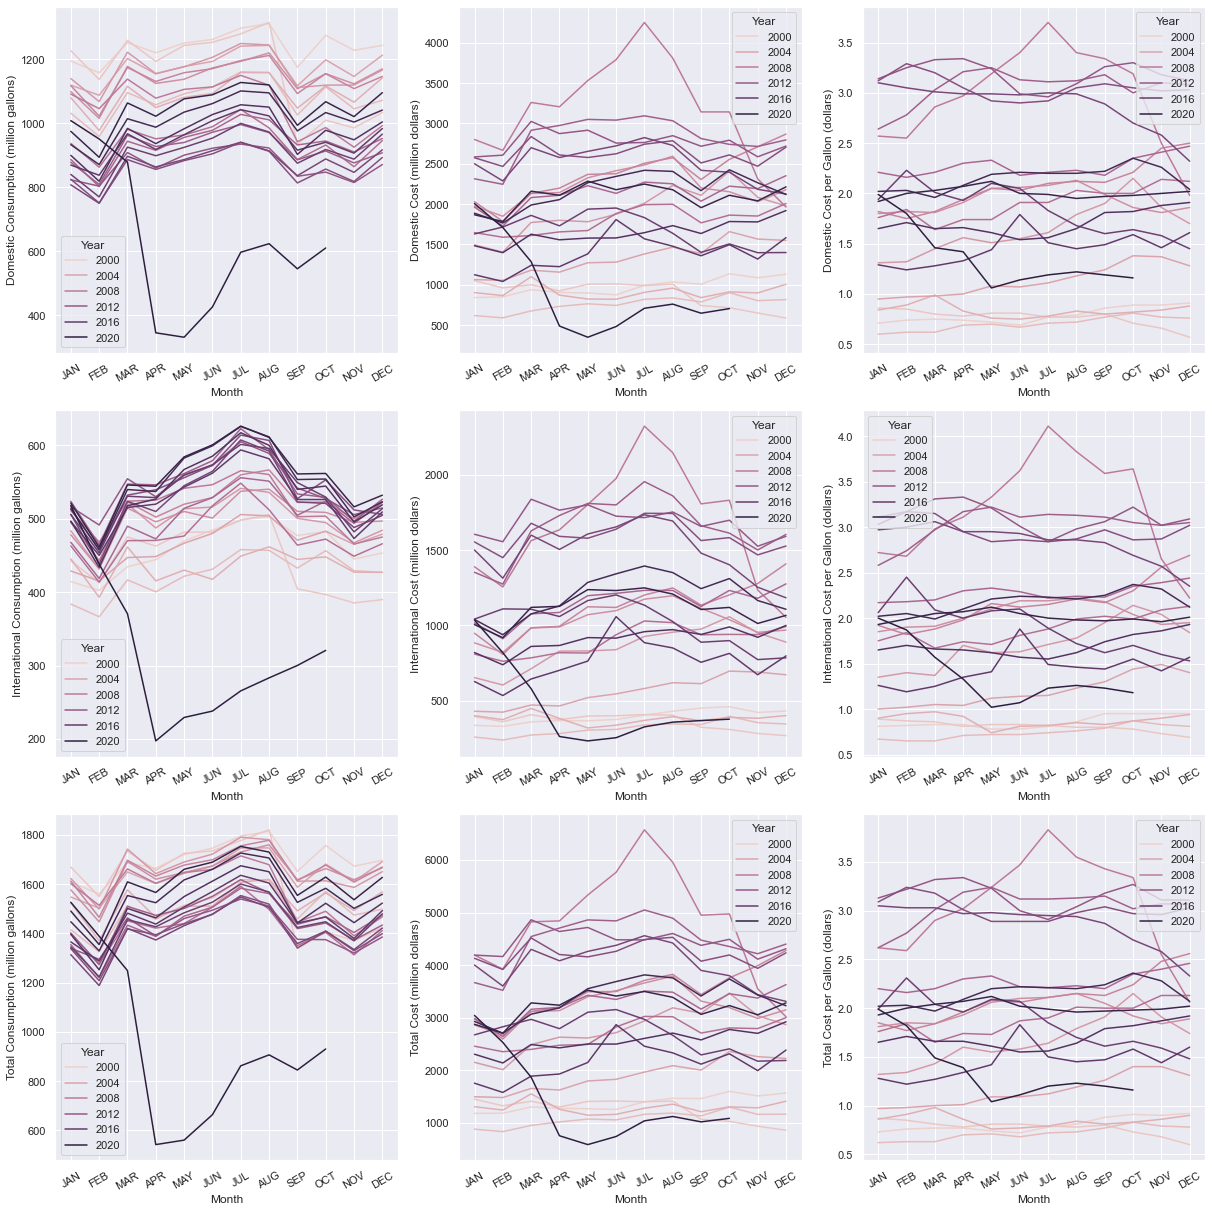

In [7]:
## NO USAR

fig, ax = plt.subplots(3, 3, figsize=(17, 17), sharex=False)
for i in range(0, 3):
    for j in range(0, 3):
        sns.lineplot(x='Month', y=df1.iloc[:, 2 + 3 * i + j], hue='Year', data=df1, ax=ax[i, j])
        ax[i,j].set_xticklabels(labels=df1['Month'], rotation=30) # Funciona
fig.tight_layout() 

In [8]:
def VIZ(figsize=(9, 6), x='Month', y='', hue='Year', data=df1, legend='full'):
    # https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.figure.Figure.html
    # https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_title.html#matplotlib.axes.Axes.set_title
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    sns.lineplot(x=x, y=y, hue=hue, data=data, ax=ax, legend=legend, palette=palette)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) # ncol=2
    plt.title(label=y,
              fontdict={'fontsize' : 20},
              loc='center',
              pad=20)

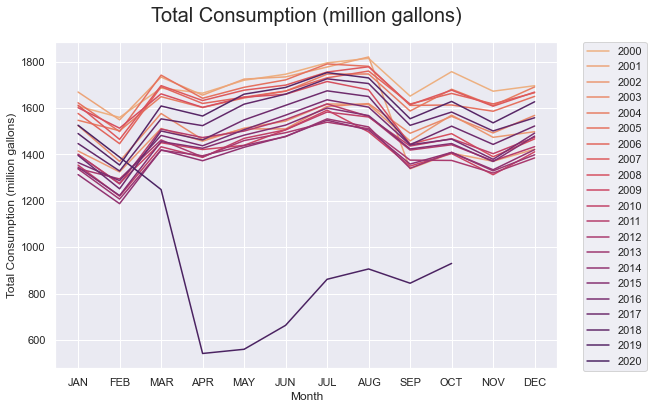

In [9]:
VIZ(figsize=(9, 6), y='Total Consumption (million gallons)', data=df1)

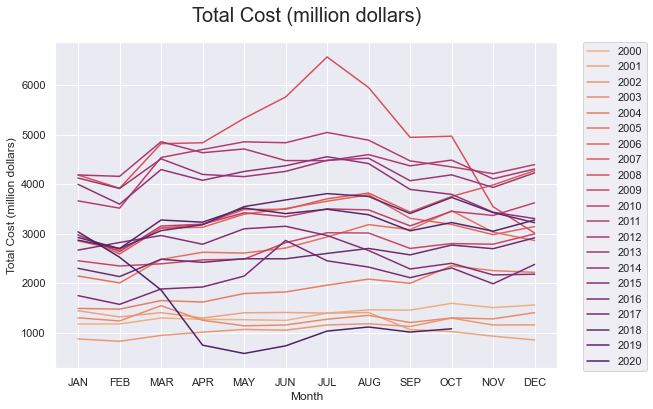

In [10]:
VIZ(figsize=(9, 6), y='Total Cost (million dollars)', data=df1)

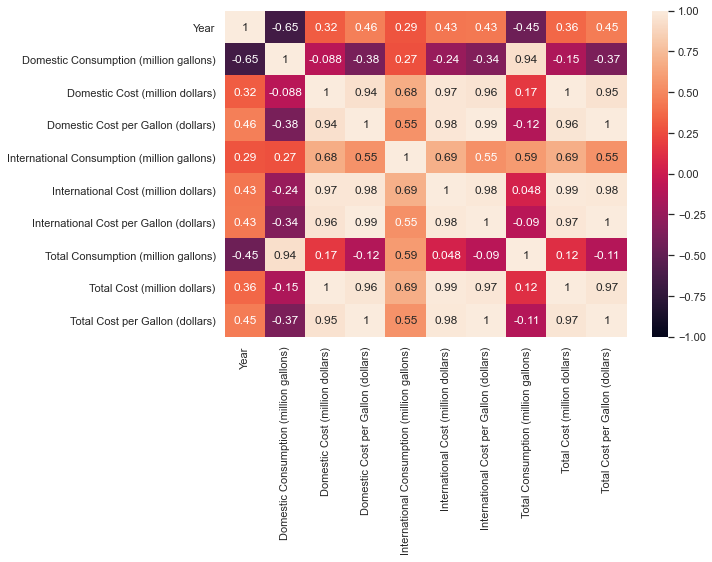

In [11]:
# Heatmap showing global correlations
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cbar=True, cmap=sns.cm.rocket);

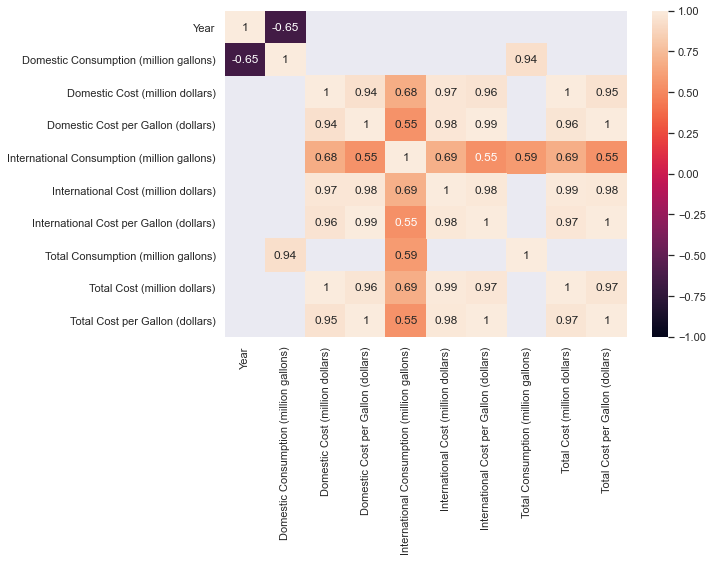

In [12]:
# Heatmap showing remarkable correlations
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cbar=True, cmap=sns.cm.rocket, mask=abs(df1.corr()) < 0.5);

Every correlation involving "Single-Total" pairs is obviously quite high. However, it is surprising to see that for *Domestic Cosumption*, there appears to be a noticeable negative correlation over time.Let's further explore this observation.

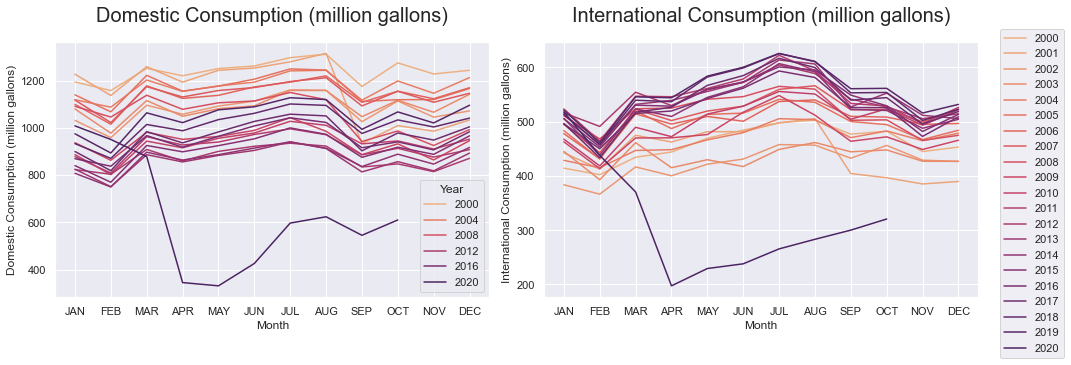

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax[0].set_title(label='Domestic Consumption (million gallons)',
                fontdict={'fontsize' : 20},
                loc='center',
                pad=20)
sns.lineplot(x='Month', y='Domestic Consumption (million gallons)',
             hue='Year', data=df1, ax=ax[0], palette=palette)

ax[1].set_title('International Consumption (million gallons)',
                fontdict={'fontsize' : 20},
                loc='center',
                pad=20)
sns.lineplot(x='Month', y='International Consumption (million gallons)',
             hue='Year', data=df1, ax=ax[1], palette=palette)

plt.legend(labels=df1['Year'].unique(), bbox_to_anchor=(1.05, 1.05), borderaxespad=0.); # ncol=2, loc='best'
fig.tight_layout() 

#### Conclusion #1
It is worth mentioning that whilst *International Consumption* has been slightly increasing over time (\$ correlation = 0.29 \$) as one might have expected, ***Domestic Consumption* has been surprisingly decreasing** (\$ correlation = -0.65 \$), .

___

### 1.1.2. 1977 - 1999

Source: https://www.transtats.bts.gov/FUEL/Fuel_Hist.aspx

- **US_AIRLINES_FUEL_COST_CONSUMPTION_2000_2020**:
    - **Summary**:
        - Airline Fuel Cost and Consumption (U.S. Carriers - Scheduled) | January 2000 - October 2020
    - **Description**:
        - Airline Fuel Cost and Consumption (U.S. Carriers - Scheduled) | January 2000 - October 2020
        - It includes data at MONTH level
        - It includes data only for US Carriers
    - **File**:
        - Fuel_Hist_Jan2000_Oct2020.csv

***Note***: the table has been quickly edited on Excel prior to importation into this notebook

In [14]:
csv_path = os.path.join(root,
                        "Raw_Data",
                        "US_DoT",
                        "Fuel_Hist_1977_1999.csv")
csv_path

'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Raw_Data\\US_DoT\\Fuel_Hist_1977_1999.csv'

In [15]:
df2 = pd.read_csv(csv_path, encoding='latin1')
df2

,Year,Domestic Consumption (million gallons),Domestic Cost (million dollars),Domestic Cost per Gallon (dollars),International Consumption (million gallons),International Cost (million dollars),International Cost per Gallon (dollars),Total Consumption (million gallons),Total Cost (million dollars),Total Cost per Gallon (dollars)
0,1977,8202.050960,2903.916483,0.35,1708.376244,685.021510,0.40,9910.427204,3588.937993,0.36
1,1978,8446.117404,3263.013081,0.39,1741.918058,736.334915,0.42,10188.035460,3999.347996,0.39
2,1979,8865.885434,4997.337860,0.56,1828.434958,1173.468510,0.64,10694.320390,6170.806370,0.58
3,1980,8519.233124,7365.449059,0.86,1747.306343,1789.650487,1.02,10266.539470,9155.099546,0.89
4,1981,8555.248712,8754.148572,1.02,2032.520313,2330.110892,1.15,10587.769030,11084.259460,1.05
5,1982,8432.465245,8163.485612,0.97,1967.732863,2126.116797,1.08,10400.198110,10289.602410,0.99
6,1983,8672.573586,7633.523987,0.88,1998.289233,1928.411150,0.97,10670.862820,9561.935137,0.90
7,1984,9625.957783,8127.915961,0.84,2286.407440,2056.280795,0.90,11912.365220,10184.196760,0.85
8,1985,10115.007160,8095.266966,0.80,2487.928853,2104.475731,0.85,12602.936020,10199.742700,0.81
9,1986,11137.330720,6074.822748,0.55,2544.996263,1556.485079,0.61,13682.326980,7631.307827,0.56


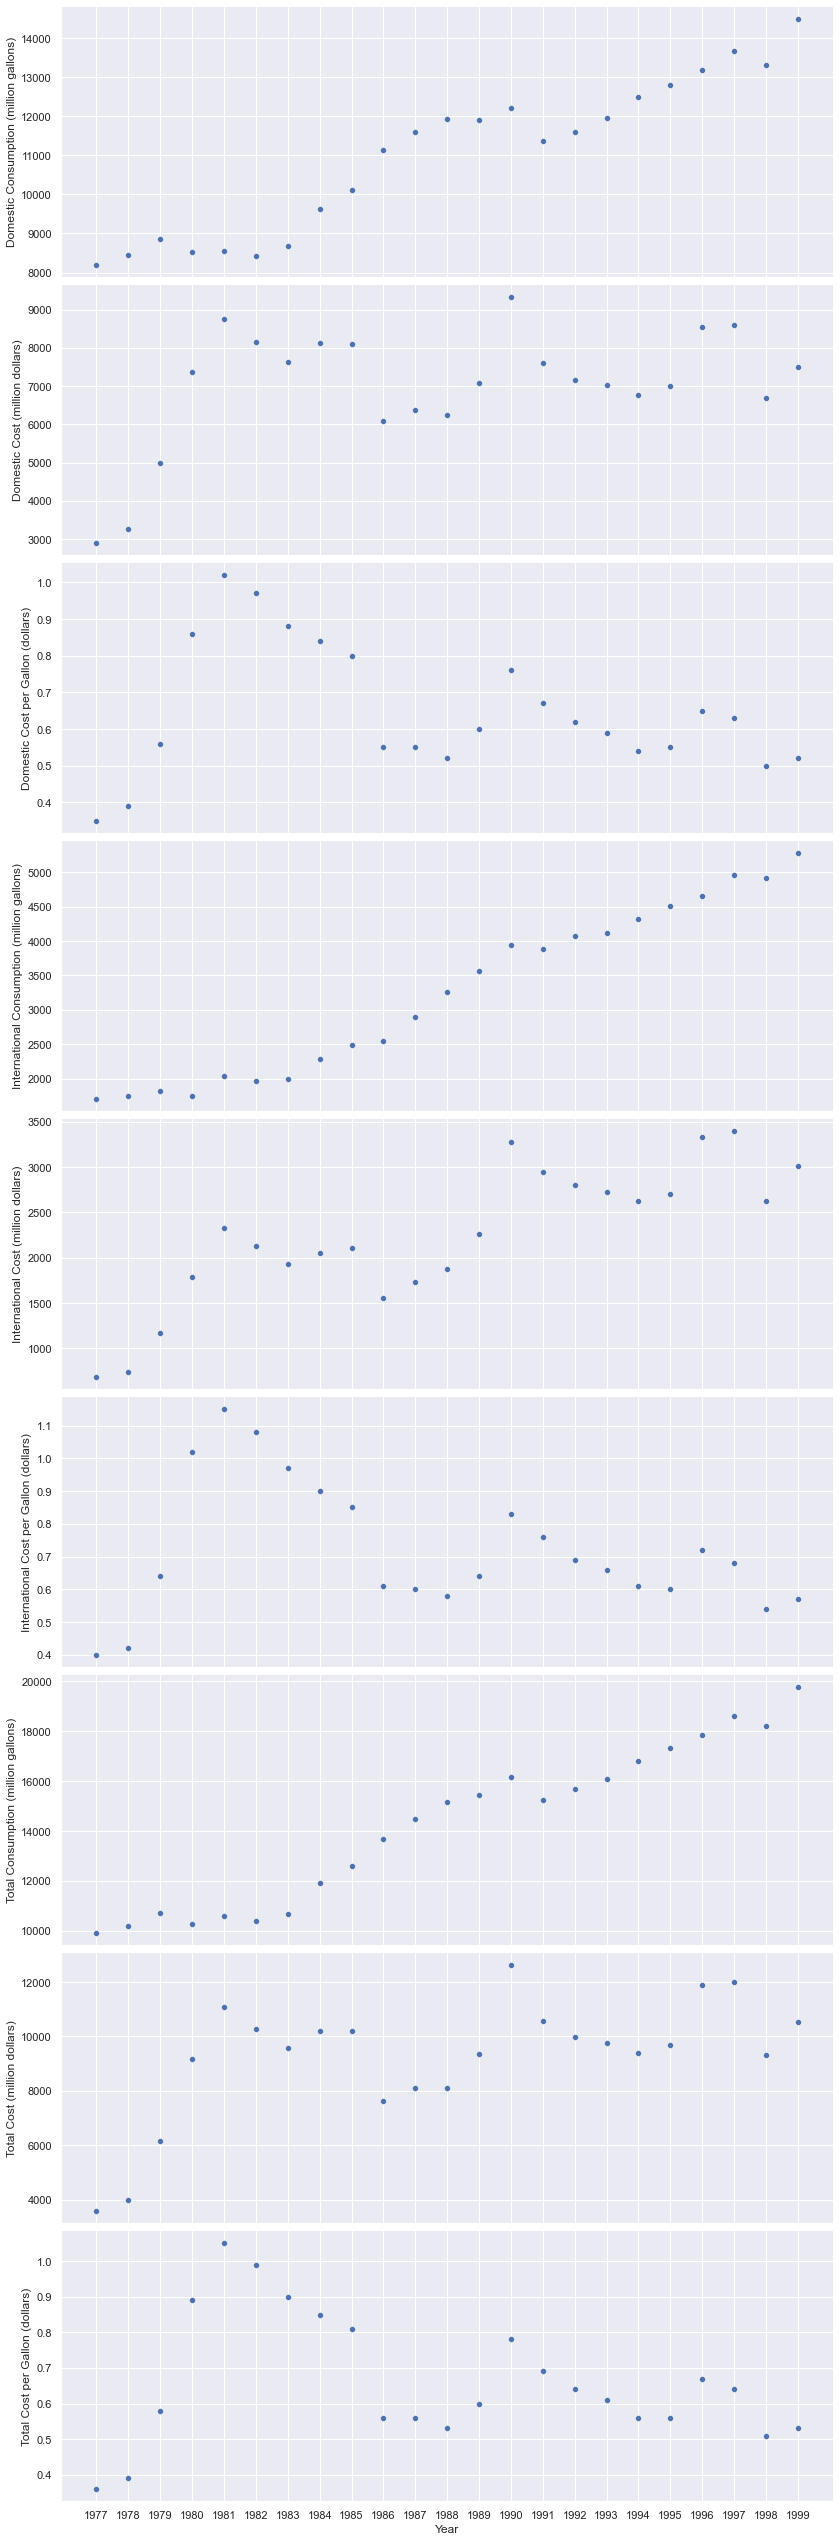

In [16]:
sns.pairplot(data=df2,
             x_vars=['Year'],
             y_vars=df2.drop(['Year'], axis=1).columns,
             diag_kind=None, # This is added to work around the "pairplot y_vars bug #2260"
             aspect=3,
             height=4).set(xticks=df2['Year'].unique(),
                           xticklabels=df2['Year'].unique());

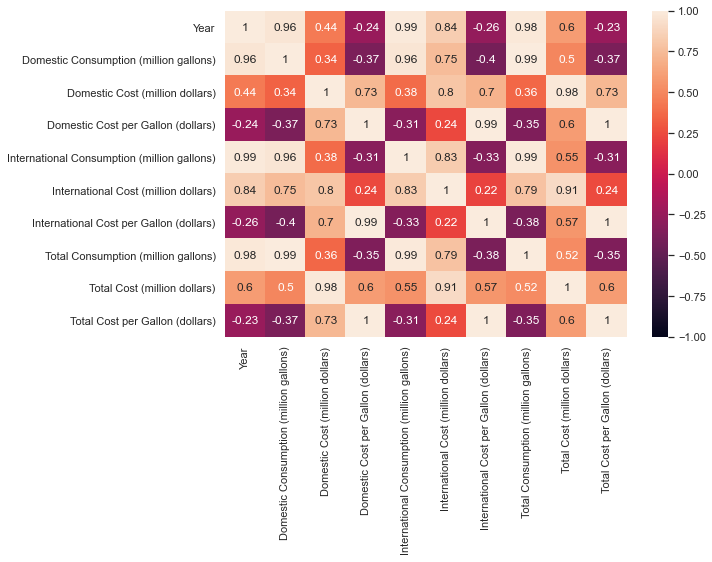

In [17]:
# Heatmap showing global correlations
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True, cbar=True, cmap=sns.cm.rocket);

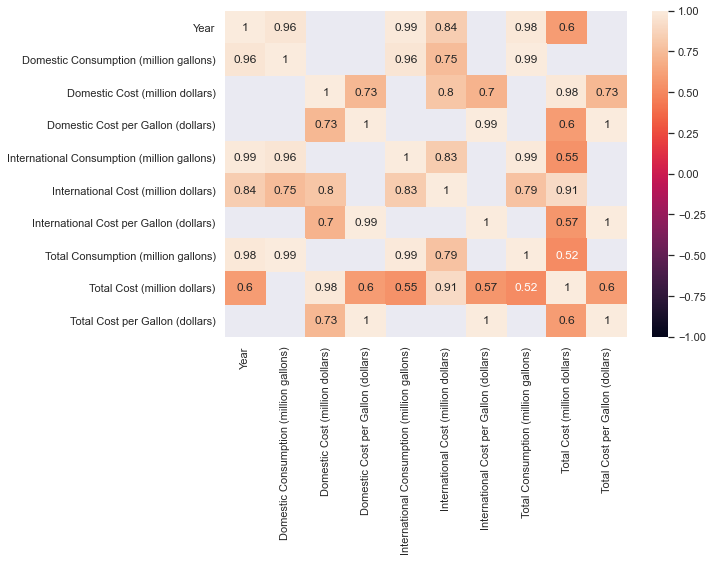

In [18]:
# Heatmap showing global correlations
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True, cbar=True, cmap=sns.cm.rocket, mask=abs(df2.corr()) < 0.5);

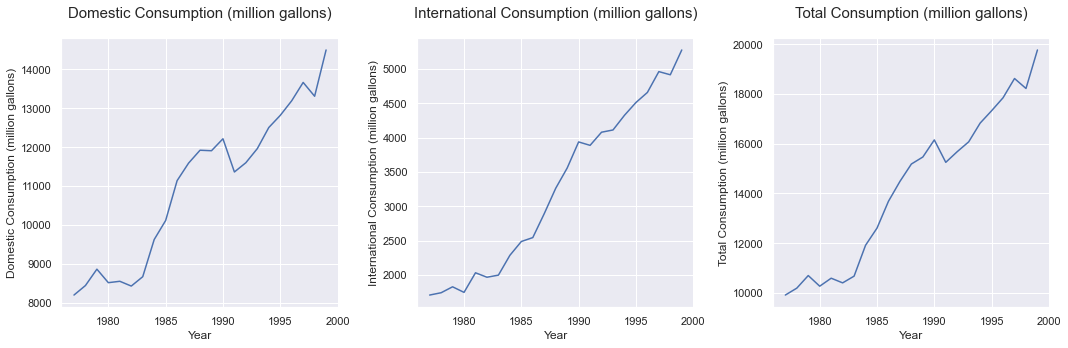

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

ax[0].set_title(label='Domestic Consumption (million gallons)',
                fontdict={'fontsize' : 15},
                loc='center',
                pad=20)
sns.lineplot(x='Year', y='Domestic Consumption (million gallons)',
             data=df2, ax=ax[0], palette=palette)

ax[1].set_title(label='International Consumption (million gallons)',
                fontdict={'fontsize' : 15},
                loc='center',
                pad=20)
sns.lineplot(x='Year', y='International Consumption (million gallons)',
             data=df2, ax=ax[1], palette=palette)

ax[2].set_title(label='Total Consumption (million gallons)',
                fontdict={'fontsize' : 15},
                loc='center',
                pad=20)
sns.lineplot(x='Year', y='Total Consumption (million gallons)',
             data=df2, ax=ax[2], palette=palette);

fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

#### Conclusion #2
In the previous chapter (i.e. 2000-2020), it was observed that contrary to common intuition of consumption being continuously incresing, *Domestic Consumption* decreased as years went by. However, here it is clear that all consumptions almost steadily rised over time in the past (1977-1999).

___